In [1]:
# Change in the masses of the PBHs due to accretion in radiation domination to 
# z_eq, post PBH formation.



%matplotlib inline
import numpy as np
from scipy.integrate import odeint
import math
from matplotlib import rcParams
import matplotlib.pyplot as plt
from matplotlib import rcParams
from module2 import *
plt.rcParams.update({
  "text.usetex": True,
  "font.family": "serif"
})
 





bin_centres = np.geomspace(1e4, 1e-4, 6)
bin_edges = np.sqrt(bin_centres[:-1]*bin_centres[1:])
ratio = bin_edges[1]/bin_edges[0] 
bin_edges = np.append(bin_edges[0]/ratio, bin_edges) 
bin_edges = np.append(bin_edges, bin_edges[-1]*ratio) 
deltas = np.diff(bin_edges)
Δ_1_list = deltas.tolist()
Δ_2_list = deltas.tolist()
m_1 = np.geomspace(1e4, 1e-4, 6)
m_2 = np.geomspace(1e4, 1e-4, 6)
m_1_list = m_1.tolist()
m_2_list = m_2.tolist() 

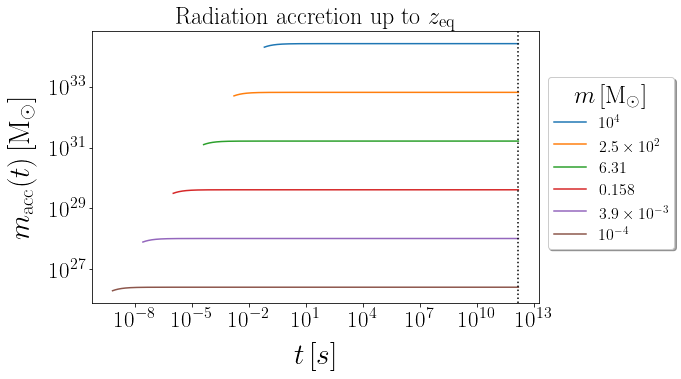

In [2]:
#Accretion of radiation around  as per https://arxiv.org/pdf/1107.2025.pdf

t_1 = t_eq 
t_2 = 2.4e17   # in units of second
t_0 = t_m
η_acc = 0.1

def m_racc_Nayak(m, t):
    c_s  = c/np.sqrt(3)
    k = ((4 * π * (G**2))/(c_s**3)) * (t_1**2) * ((t_1/t_2)**(-8/3)) * (np.exp(-4 * H_0 *(t_2 -t_0)))
    x = 1/t
    x_i = 1/t_i
    first_term  = k *  ρ_r0 *  (x - x_i) *  η_acc
    second_term = 1/m
    return (1/(first_term + second_term))
    

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    t_i = (4 * G * m)/(3 * c**3)
    t = np.geomspace(t_i, t_eq, 100000)
    t_list = t.tolist()
    m_racc_Nayak_list = np.zeros(len(t_list))
    ax.loglog(t, m_racc_Nayak(m, t), color = color)
    

plt.axvline(x = t_eq,  color = 'k',  linestyle = ':')
plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$t\,[s]$',fontsize = 29.5, labelpad = 12)
plt.ylabel('$m_\mathrm{acc}(t) \, [\mathrm{M_{\odot}}]$',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
#plt.savefig('racc.pdf', bbox_inches = 'tight')
plt.show()

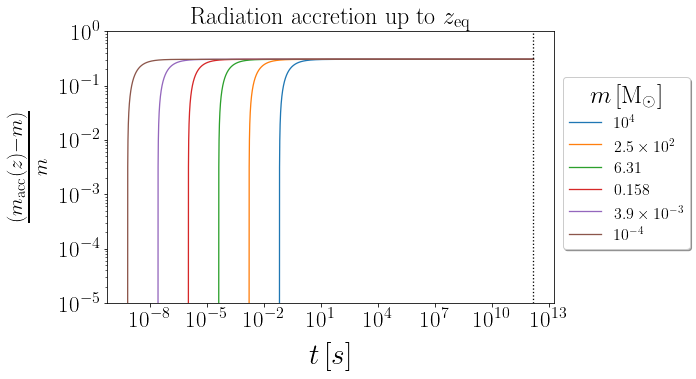

In [3]:
# Fractional change in the mass of the PBH due to radiation accretion upto z_eq.

fig, ax = plt.subplots(1, figsize = (8, 5))
colors = ['C0', 'C1','C2','C3','C4', 'C5']

for i, (m, color) in enumerate(zip(m_1_list, colors)):
    m*= M_solar
    t_i = (4 * G * m)/(3 * c**3)
    t = np.geomspace(t_i, t_eq, 100000)
    t_list = t.tolist()
    m_racc_change_Nayak_list = np.zeros(len(t_list))  
    ax.loglog(t, ((m_racc_Nayak(m, t) - m)/m), color = color)
    
    
  
    
plt.axvline(x = t_eq,  color = 'k',  linestyle = ':')


plt.rc('lines', linewidth = 1.3)
plt.xticks(fontsize = 23)
plt.yticks(fontsize = 23)
plt.xlabel('$t\, [s]$',fontsize = 29.5, labelpad = 12)
plt.ylabel(r'$\frac{(m_\mathrm{acc}(z) - m)}{m} $',fontsize = 29.5, labelpad = 12)
plt.legend(['$10^{4}$', r'$2.5\times 10^{2}$',
            '$6.31$', '$0.158$', r'$3.9\times 10^{-3}$', '$10^{-4}$'], 
           prop = {'size':16}, loc = (1.02, 0.2), shadow = True, 
           title = '$m\, [\mathrm{M_{\odot}}]$' ,
           title_fontsize = 25, facecolor = 'white', fontsize = 65)

plt.ylim(1e-5, 1)
plt.title('Radiation accretion up to $z_\mathrm{eq}$', fontsize = 24, pad = 8)
plt.savefig('raccΔ_check.pdf', bbox_inches = 'tight')
plt.show()

In [6]:
np.exp(0.32)

1.3771277643359572

In [9]:
np.exp(0.3)

1.3498588075760032